In [2]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from statsmodels.formula.api import ols



from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

### All I am goingto do is pick outthe best predictors, and add the dummy columns i have already worked on.

In [33]:
# import data
X = pd.read_csv('../cleanedData/X.imputed.csv', index_col=0)
# X = pd.read_csv('../cleanedData/X_standardized.csv', index_col=0)
y = pd.read_csv('../raw/y.csv', header=None)
df = pd.read_csv('../raw/kc_house_data_train.csv')
geo = pd.read_csv('../cleanedData/geoOverlap.csv', index_col=0)
hbd = pd.read_csv('../cleanedData/hdb_clusters.csv')
zipcode = pd.read_csv('../cleanedData/zipcodeDummies.csv')
season = pd.read_csv("../cleanedData/seasonDummies.csv")

y.columns = ['price']
X = pd.concat([X,geo,zipcode, season], axis=1)
X.head()
X.shape, geo.shape, zipcode.shape, season.shape

((17290, 269), (17290, 177), (17290, 70), (17290, 2))

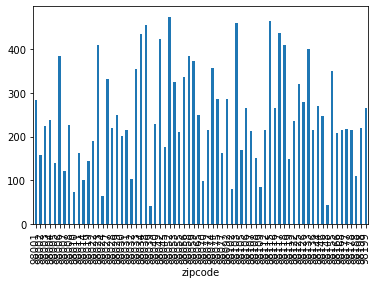

In [4]:
X.groupby(['zipcode']).id.count().plot(kind='bar')

In [34]:
geo.head()

,c22uz,c22vm,c22vn,c22vp,c22vr,c22vs,c22vt,c22vu,c22vv,c22vw,...,c23r2,c23r3,c23r4,c23r6,c23r8,c23r9,c23rd,c23rf,c23xm,c23xq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
geo.shape

(17290, 177)

In [6]:
# from sklearn.feature_selection import RFE
# model = LinearRegression()
# rfe = RFE(estimator=model, n_features_to_select=7, step=1)
# rfe = rfe.fit(X_train, y_train)
# selected_rfe_features= pd.DataFrame({'Feature': list(X_train.columns),
#                                     'Ranking': rfe.ranking_})
# selected_rfe_features.sort_values(by='Ranking')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )

In [8]:
to_drop = [
    'date',
    'id',
    'zipcode',
    'yr_renovated',
    'sqft_basement'

]

In [9]:
X_train = X_train.drop(columns = to_drop)
X_test = X_test.drop(columns = to_drop)

In [16]:
X_train.shape

(13832, 264)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_hat)**0.5
RMSE

153249.4310369812

In [18]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cross_val_score(estimator=lr, X=X_train, y=y_train, cv = 10)

array([0.79168747, 0.81799673, 0.83017137, 0.80401938, 0.8437424 ,
       0.83429335, 0.79857207, 0.77161423, 0.78637397, 0.79838935])

In [19]:
# test the model at scale
holdout = pd.read_csv('../raw/kc_holdout_data.csv')
# Get zipcode dummies 
zipcodes_dummies = pd.get_dummies(holdout.zipcode)

# get geo

### So the best we can do is 150K range, that has no feature normalization at all. How do we improve this?

In [20]:
holdoutZipcodes = pd.read_csv('../cleanedData/holdoutZipcodes.csv', index_col=0)
holdoutGeo = pd.read_csv('../cleanedData/holdoutGeo.csv', index_col=0)
holdoutSeason = pd.read_csv('../cleanedData/holdoutSeason.csv', index_col=0)
X_holdout = pd.read_csv('../raw/kc_holdout_data.csv', index_col=0)

In [21]:


holdout_df = pd.concat([X_holdout, holdoutGeo,holdoutZipcodes, holdoutSeason], axis=1)
holdout_df = holdout_df.drop(columns=to_drop)

In [22]:
X_train.columns == holdout_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [26]:
X.drop(columns=to_drop, inplace=True)

In [27]:
holdout_df.shape

(4323, 264)

In [28]:
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(holdout_df)

In [29]:
pd.DataFrame(y_hat).to_csv('../cleanedData/modelOne.csv', index=False)

In [32]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
np.mean(cross_val_score(estimator=lr, X=X, y=y, cv = 10))

0.8122342441285977